# Factors Contributing to a Borrower's APR
## by Oluwatosin Obisan

## Investigation Overview

> For this investigation, I am interested in the factors that contribute to the annual percentage rate (APR) of a borrower. The variables investigated are the following columns; IsBorrowerHomeowner, ProsperRating (Alpha), LoanOriginalAmount.

## Dataset Overview

> The data consists of 113937 borrowers and several information about the loans provided to them. I dropped 25 rows from the dataset since the borrowers APR is the main variable being investigated, and there are 25 null values in the column.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loan_df = pd.read_csv('prosperLoanData.csv')

In [3]:
# Convert listing creation date column to datetime
loan_df['ListingCreationDate'] = pd.to_datetime(loan_df['ListingCreationDate'])

In [4]:
# Create a new column year and extract year from List creation date column
loan_df['year'] = pd.DatetimeIndex(loan_df['ListingCreationDate']).year

In [5]:
# Convert employment status column to categorical data type
loan_df['EmploymentStatus'] = loan_df['EmploymentStatus'].astype('category')

In [6]:
# Select features of interest and put them in a new data frame
columns = ['LoanStatus', 'BorrowerAPR', 'LoanOriginalAmount', 'StatedMonthlyIncome', 'ProsperRating (Alpha)', 
        'EmploymentStatus', 'Term', 'IsBorrowerHomeowner', 'year']
df_sub = loan_df[columns]

In [7]:
# Drop lrows with missing borrower APR information
df_sub = df_sub[~df_sub.BorrowerAPR.isna()]

In [8]:
# Convert prosper rating (Alpha) column to categorical data type
rating_order = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']
ratings_ordered = pd.api.types.CategoricalDtype(ordered=True, categories = rating_order)

df_sub['ProsperRating (Alpha)'] = df_sub['ProsperRating (Alpha)'].astype(ratings_ordered)

## Distribution of Borrrowers APR

> The range of the borrowers APR starts at about 0.01 and stops at 0.42. The distribution peaks between 0.35 and 0.36. This means that majority of the borrowers were given an APR of 0.36%.

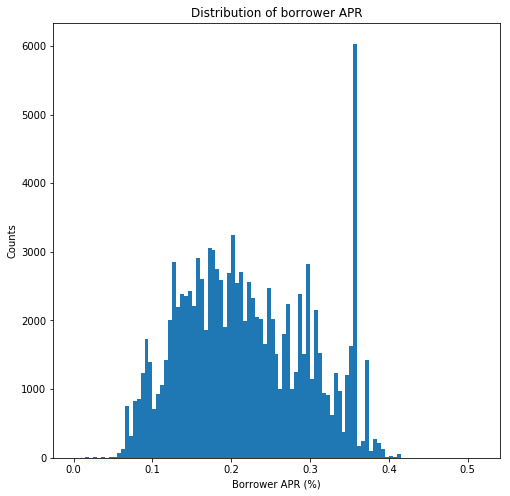

In [9]:
plt.figure(figsize = [8, 8]) # larger figure size for subplots

# histogram plot for borrower APR
bin_size = 0.005
bin_edges = np.arange(0, df_sub['BorrowerAPR'].max()+bin_size, bin_size)
plt.hist(data = df_sub, x = 'BorrowerAPR', bins = bin_edges)
plt.xlabel('Borrower APR (%)')
plt.ylabel('Counts')
plt.title('Distribution of borrower APR');

## Distribution of the Original Loan Amount

> The distribution of the origial loan amount column shows that the loans given out ranges between 1000 and 35000. The high peaks are around 3000, 10000, and 15000

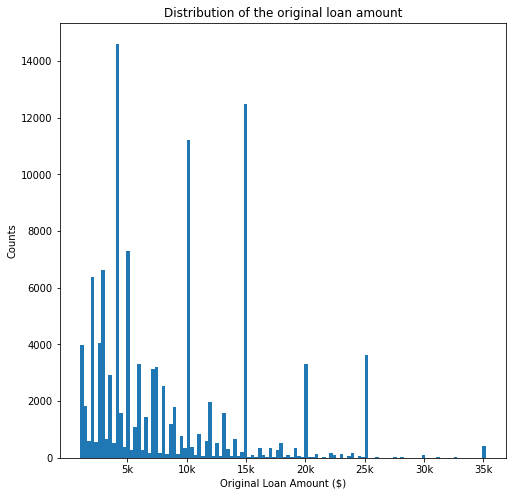

In [10]:
plt.figure(figsize = [8, 8]) # larger figure size for subplots

# histogram plot for Original loan amount

bin_edges = np.arange(1000, df_sub['LoanOriginalAmount'].max()+300, 300)
plt.hist(data = df_sub, x = 'LoanOriginalAmount', bins = bin_edges)
plt.xlabel('Original Loan Amount ($)')
plt.xticks([5e3, 1e4, 15e3, 2e4, 25e3, 3e4, 35e3], ['5k', '10k', '15k', '20k', '25k', '30k', '35k'])
plt.ylabel('Counts')
plt.title('Distribution of the original loan amount');

## Homeownership as a contributing factor to the APR

> The pattern of the plot reveals that through the years, the range of APRs for non-homeowners have always been higher than homeowners. Another point worthy of noting is that APRs for non-homeowners reached its peak 2010, and has continuously declined for both parties. 

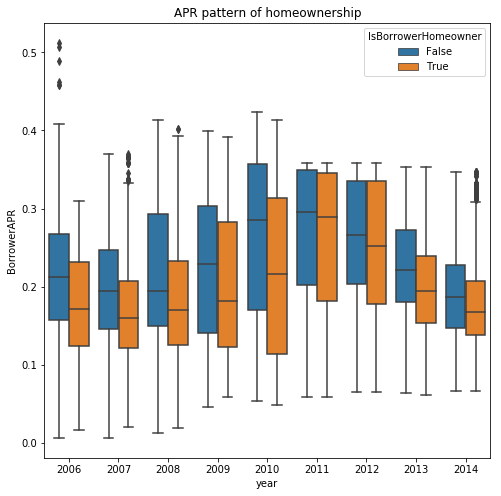

In [11]:
# Boxplot for APR pattern between homeowners and non-homeowners
plt.figure(figsize=(8, 8))
g = sb.boxplot(data = df_sub, x='year', y='BorrowerAPR', hue='IsBorrowerHomeowner')
plt.title('APR pattern of homeownership');

## Borrower APR Vs Prosper Rating Vs Term
> The point plot was used to investigate the pattern of the APR across the rating and loan terms. This investigation was to determine if the prosper rating and loan terms contributed to the borrowers APR. While the rating contributed to the APR, the loan term is not always a contributing factor. In some of the rating, the 12 months term had a better APR, and in some, the highest APR. 

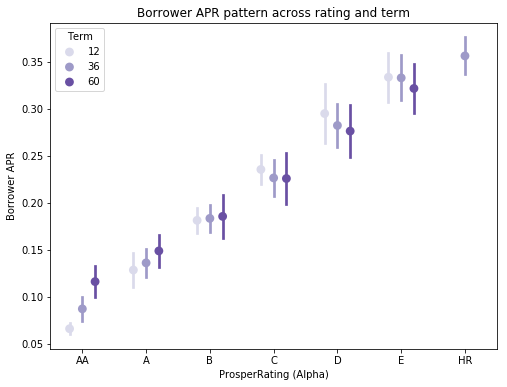

In [12]:
# Plot for borrower APR vs Term vs Prosper Rating
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = df_sub, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR', hue = 'Term',
           palette = 'Purples', linestyles = '', dodge = 0.4, ci = 'sd')
plt.title('Borrower APR pattern across rating and term')
plt.ylabel('Borrower APR')
ax.set_yticklabels([],minor = True)
plt.show();

## Borrower APR Vs Loan Original Amount
> Seaborn's regplot() function was used to investigate the relationship betwwen the original loan amount and thE APR. The plot reveals that while there is a wide range of APR for each corresponding loan amount, there is a negative linear relationship between both variables, i.e., the APR reduces as the loan amount increases.

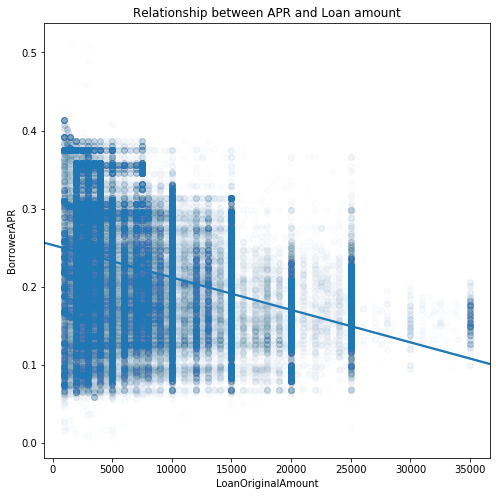

In [13]:
# Plot a scatter plot for loan original amount and borrower APR
plt.figure(figsize = [8, 8])
sb.regplot(data = df_sub, x = 'LoanOriginalAmount', y = 'BorrowerAPR', scatter_kws={'alpha':0.01})
plt.title('Relationship between APR and Loan amount');